# Hazard: RiverFlood

A river flood hazard is generated by the class RiverFlood() that extracts flood data simulated within the Inter-Sectoral Impact Model Intercomparison Project (ISIMIP, https://www.isimip.org/). 
The method set_from_nc() generates a data set with flood depth in m and the flooded fraction in each centroid. The data derived from global hydrological models driven by various climate forcings. A link to the ISIMIP data repository will be provided soon. In this tutorial we show how flood depth and fractions can be transated into socio-economic impacts.

Besides, all other general Hazard Attributes, the class RiverFlood() has further Attributes related to the flooded area and flood volume: 

#### additional Attributes (always calculated)
|Name|Data Type|Description|
|----|---------|----------------------|
|fla_ann_av|float|average flooded area per year|
|fla_ev_av|float|average flooded area per event|
|fla_event|1d array(n_events)|average flooded area per year|
|fla_annual|1d array(n_years)|average flooded area per event|


#### additional Attributes (only calculated if 'save_centr' = True in 'set_flooded_area()')
|Name|Data Type|Description|
|----|---------|----------------------|
|fla_ev_centr|2d array(n_events x n_centroids)|flooded area in every centroid for every event|
|fla_ann_centr|2d array(n_years x n_centroids)|flooded area in every centroid for every year|
|fv_ann_centr|2d array(n_years x n_centroids)|flood volume in every centroid for every year|

#### How is this tutorial structured?

Part 1: Data availability and use

Part 2: Generating a RiverFlood Hazard

Part 3: Calculating Flooded Area

Part 4: Generating ISIMIP Exposure

Part 5: Setting JRC damage functions

Part 6: Deriving flood impact with LitPop exposure


## Part 1: Data availability and use
To work with the CLIMADA RiverFlood-Module input data containing spatially explicit flood depth and flooded fraction is required.

The input data can be found at https://files.isimip.org/cama-flood/ *.

On this page, data from the ISIMIP2a and ISIMIP2b simulation rounds can be accessed. The simulations contain the output of the river routing model CaMa-Flood for runoff input data generated by various combinations of global hydrological models (GHMs) and climate forcings.

### ISIMIP2a

In the ISIMIP2a simulation round, 12 GHMs were driven by 4 climate reanalysis data sets and covers the time period 1971-2010. The runoff was used as input for CaMa-Flood to derive spatially explicit flood depth (flddph) and flooded fraction (fldfrc) of the maximum flood event of each year on 150 arcsec (~ 5 km) and 300 arcsec (~ 10 km) resolution. Data are provided for different protection standards including '0'- no protection, '100'- protection against all events smaller than 100 year return period, and'Flopros'- merged layer in the Flopros data base on global protection standards. File naming conventions follow the scheme:

<indicator_resolution_GHM_ClimateForcingDataset_ProtectionStandard.nc>

### ISIMIP2b

In the ISIMIP2b simulation round, 6 GHMs were driven by 4 global circulation models (GCMs) and covers the time period 2005-2100 for RCP 2.6, 6.0 and RCP8.5 (only a smaller ensemble). Additionally, historical and preindustrial control runs are provided. Resolution and protection assumptions are the same as under ISIMIP2a. File naming conventions follow the scheme:

<indicator_resolution_GHM_GCM_ProtectionStandard.nc>


### For futher information on flood data generation see also:

Willner, S. N. et al. (2018) ‘Adaptation required to preserve future high-end river flood risk at present levels’, Science Advances. American Association for the Advancement of Science, 4(1), p. eaao1914. doi:10.1126/sciadv.aao1914.

Willner, S. N., Otto, C. and Levermann, A. (2018) ‘Global economic response to river floods’, Nature Climate Change. Nature Publishing Group, 8(7), pp. 594–598. doi:10.1038/s41558-018-0173-2.

Sauer, I. et al. (2020) ‘Climate Signals in River Flood Damages Emerge under Sound Regional Disaggregation’. doi:10.21203/rs.3.rs-37259/v1.

*Currently, log-in data are required, please contact inga.sauer@pik-potsdam.de to obtain access.



## Part 2: Generating a RiverFlood Hazard

A river flood is generated with the method set_from_nc(). There are different options for choosing centroids.
You can set centroids for:
- countries
- regions
- global hazards
- with random coordinates
- with random shape files (under development)

Countries or regions can either be set with corresponding ISIMIPNatID centroids (ISINatIDGrid = True) or with Natural Earth Multipolygons (default).
It is obligatory to set paths for flood depth and flood fraction, here we present example files from floods for the year 2000.


### Setting floods for countries with Natural Earth Multipolygons:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from climada.hazard.river_flood import RiverFlood
from climada.hazard.centroids import Centroids
from climada.util.constants import HAZ_DEMO_FLDDPH, HAZ_DEMO_FLDFRC

years = [2000]
# generating RiverFlood hazard from netCDF file
# uses centroids from Natural Earth Multipolygon for Germany and Switzerland
rf = RiverFlood()
rf.set_from_nc(countries = ['DEU','CHE'], years=years, dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC)
rf.event_name 

2021-07-08 11:43:45,745 - climada.util.coordinates - INFO - Reading /home/matej/climada/demo/data/flddph_2000_DEMO.nc
2021-07-08 11:43:45,765 - climada.util.coordinates - INFO - Reading /home/matej/climada/demo/data/fldfrc_2000_DEMO.nc


['2000']

In [2]:
# Note: Points outside the selected countries are masked in further analysis.
# plot centroids:
rf.centroids.plot()
# get resolution
print('resolution:')
rf.centroids.meta['transform'][0]

resolution:


0.04166666666666662

In [3]:
# plotting intensity (Flood depth in m)
rf.plot_intensity(event=0, smooth = False)

<GeoAxesSubplot:title={'center':'RF max intensity at each point'}>

### Setting flood with ISIMIP NatIDGrid:

2021-03-05 12:49:52,452 - climada.util.coordinates - INFO - Reading /Users/ckropf/climada/demo/data/flddph_2000_DEMO.nc
2021-03-05 12:49:52,476 - climada.util.coordinates - INFO - Reading /Users/ckropf/climada/demo/data/fldfrc_2000_DEMO.nc


/Users/ckropf/Documents/Climada/climada_python/climada/util/plot.py:326: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


/Users/ckropf/opt/anaconda3/envs/climada_uncertainty/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


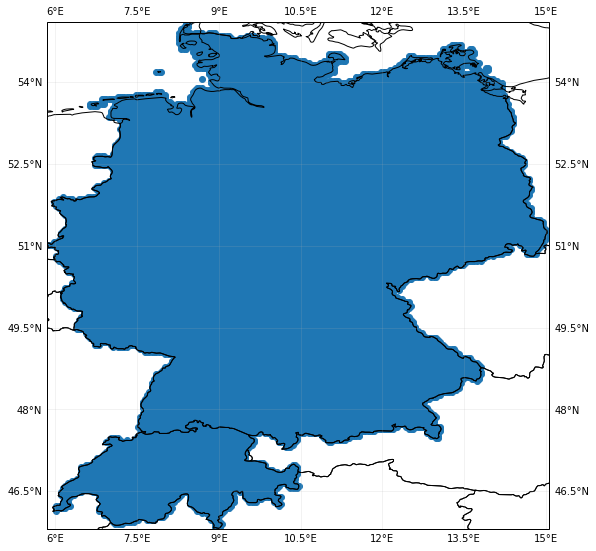

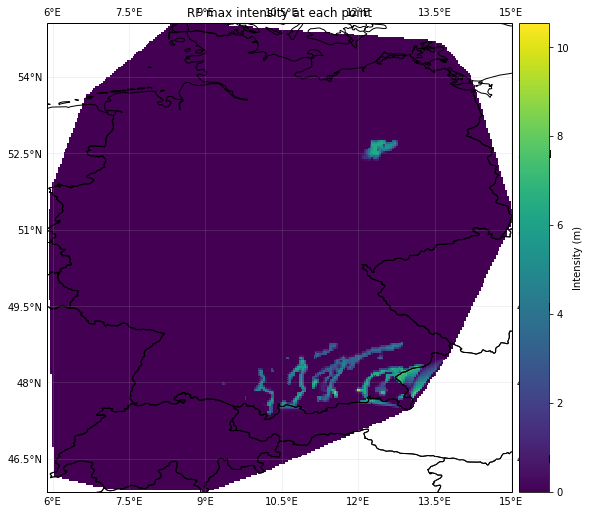

In [4]:
# generating RiverFlood hazard from netCDF file, using the ISIMIP NatIDGrid (according to ISIMIP standards) with a resolution of 150as (aprox 5km)
# setting centroids for a region
rf_isi = RiverFlood()
rf_isi.set_from_nc(countries = ['DEU','CHE'], years=years, dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC, ISINatIDGrid=True)
rf_isi.centroids.plot()
rf_isi.plot_intensity(event=0, smooth = False)

### Setting flood with random points as coordinates:

2021-03-05 12:49:55,969 - climada.util.coordinates - INFO - Reading /Users/ckropf/climada/demo/data/fldfrc_2000_DEMO.nc
2021-03-05 12:49:55,976 - climada.util.coordinates - INFO - Reading /Users/ckropf/climada/demo/data/flddph_2000_DEMO.nc


/Users/ckropf/Documents/Climada/climada_python/climada/util/plot.py:326: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


/Users/ckropf/opt/anaconda3/envs/climada_uncertainty/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


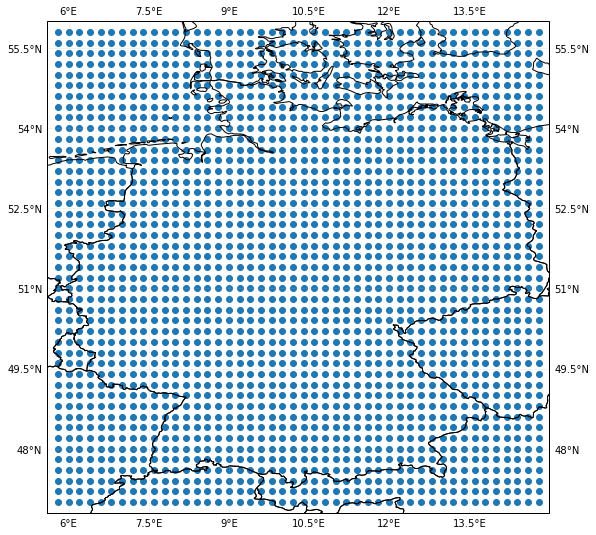

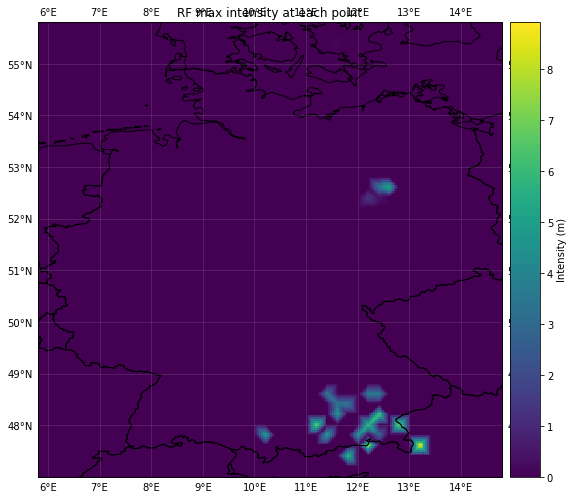

In [5]:
rand_centroids = Centroids()
lat = np.arange(47, 56, 0.2)
lon = np.arange(5.8, 15, 0.2)
lon, lat = np.meshgrid(lon, lat)
rand_centroids.set_lat_lon(lat.flatten(), lon.flatten())
rf_rand = RiverFlood()
rf_rand.set_from_nc(dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC,
                    centroids=rand_centroids, ISINatIDGrid=False)
rf_rand.centroids.plot()
rf_rand.plot_intensity(event = 0)


2021-03-05 12:49:59,109 - climada.util.coordinates - INFO - Reading /Users/ckropf/climada/demo/data/fldfrc_2000_DEMO.nc
2021-03-05 12:49:59,116 - climada.util.coordinates - INFO - Reading /Users/ckropf/climada/demo/data/flddph_2000_DEMO.nc


/Users/ckropf/Documents/Climada/climada_python/climada/util/plot.py:326: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


/Users/ckropf/opt/anaconda3/envs/climada_uncertainty/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


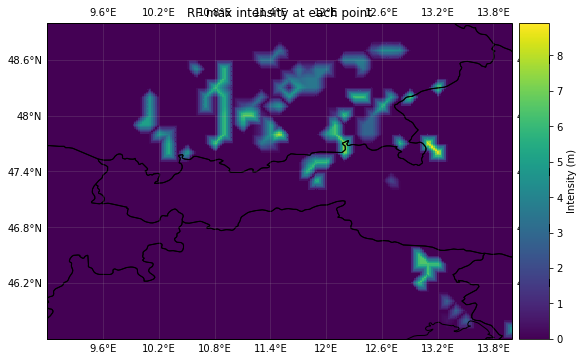

In [6]:
# setting random poits using raster
min_lat, max_lat, min_lon, max_lon = 45.6 , 49., 9., 14.
cent = Centroids()
cent.set_raster_from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.1)
rf_rast = RiverFlood()
rf_rast.set_from_nc(dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC,
                    centroids=cent, ISINatIDGrid=False)
rf_rast.plot_intensity(event=0)

## Part 3: Calculating Flooded Area
The fraction indicates the flooded part of a grid cell. It is possible to calculate the flooded area for each grid cell and for the whole area under consideration 

As ISIMIP simulations currently provide yearly data with the maximum event, event and yearly flooded area are the same.

2021-03-05 12:50:02,680 - climada.util.coordinates - INFO - Reading /Users/ckropf/climada/demo/data/flddph_2000_DEMO.nc
2021-03-05 12:50:02,692 - climada.util.coordinates - INFO - Reading /Users/ckropf/climada/demo/data/fldfrc_2000_DEMO.nc


/Users/ckropf/Documents/Climada/climada_python/climada/util/plot.py:326: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


2021-03-05 12:50:03,068 - climada.hazard.centroids.centr - INFO - Convert centroids to GeoSeries of Point shapes.
Total flooded area for year 2000 in Germany:
2437074832.038374 m2
Total flooded area at first event in Germany:
2437074832.038374 m2


/Users/ckropf/opt/anaconda3/envs/climada_uncertainty/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


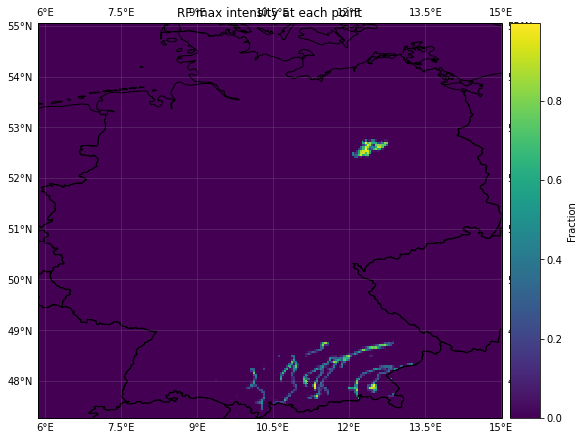

In [7]:
#setting river flood
rf_DEU = RiverFlood()
rf_DEU.set_from_nc(countries = ['DEU'], years=years, dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC)
rf_DEU.plot_fraction(event=0, smooth = False)
# calculating flooded area
rf_DEU.set_flooded_area()
print("Total flooded area for year " + str(years[0]) + " in Germany:")
print(str(rf_DEU.fla_annual[0]) + " m2")

print("Total flooded area at first event in Germany:")
print(str(rf_DEU.fla_event[0]) + " m2")


In [8]:
#calculate flooded area
rf_DEU.set_flooded_area(save_centr = True)
print("affected area in each affected centroid and each event:")
rf_DEU.fla_ev_centr.data

affected area in each affected centroid and each event:


array([  584715.81718056,  5053615.42987047,   584715.81718053,
         772660.21477222,  4635961.19139062,  4844788.31063079,
         877073.72577079,    62648.12847878,   793542.93642048,
         710012.09844878,   104512.31458989,  7942935.27615602,
       12980428.9975574 ,  8862643.59587924, 11015597.79960522,
        8151960.31900815,  8026545.7605037 ,  8110155.46617279,
        3428003.77254628,  2550100.30565756,  5748176.99827292,
       10743865.08816197, 10116791.51696033,   167219.69117698,
         167377.62651458,  2426975.61490724,  7866748.53143359,
       12448711.57332617, 10691246.31833798,  3807841.25590698,
         795043.7594347 ,  9958969.25866094, 10858623.66475107,
       10586635.08712338,  9938046.70065339,  9414992.10340605,
        4100752.00183631,    20922.20331432,  4020851.5658597 ,
        8628077.07461108, 12271973.68427333, 11036399.71240725,
        6135986.84213667,  5863741.76936025,  5319251.23373377,
        7936993.24829797, 12104437.71477

## Part 4: Generating ISIMIP Exposure
The exposed assets are calculated by means of national GDP converted to total national wealth as a proxy for asset distribution, downscaled by means of data from spatially explicit GDP distribution. Data for past (1971-2010) and future (2005-2100) periods can be accessed at ISIMIP, https://www.isimip.org/ .

More information on spatially explicit GDP time series:

Geiger, T. (2018) ‘Continuous national gross domestic product (GDP) time series for 195 countries: Past observations (1850-2005) harmonized with future projections according to the Shared Socio-economic Pathways (2006-2100)’, Earth System Science Data. Copernicus GmbH, pp. 847–856. doi: 10.5194/essd-10-847-2018.

Murakami, D. and Yamagata, Y. (2019) ‘Estimation of gridded population and GDP scenarios with spatially explicit statistical downscaling’, Sustainability (Switzerland). Multidisciplinary Digital Publishing Institute, 11(7), p. 2106. doi: 10.3390/su11072106.

In [9]:
# set exposure for damage calculation
from climada.entity.exposures.gdp_asset import GDP2Asset
from climada.util.constants import DEMO_GDP2ASSET
gdpa = GDP2Asset()
gdpa.set_countries(countries = ['CHE'], ref_year = 2000, path=DEMO_GDP2ASSET)
gdpa

2021-03-05 12:50:14,420 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-03-05 12:50:14,421 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-03-05 12:50:14,422 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-03-05 12:50:14,423 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-03-05 12:50:14,424 - climada.entity.exposures.base - INFO - crs set to default value: EPSG:4326


/Users/ckropf/opt/anaconda3/envs/climada_uncertainty/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


2021-03-05 12:50:18,435 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-03-05 12:50:18,436 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-03-05 12:50:18,436 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-03-05 12:50:18,437 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-03-05 12:50:18,438 - climada.entity.exposures.base - INFO - crs set to default value: EPSG:4326
2021-03-05 12:50:18,444 - climada.entity.exposures.base - INFO - meta set to default value {}


/Users/ckropf/Documents/Climada/climada_python/climada/util/plot.py:326: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


/Users/ckropf/opt/anaconda3/envs/climada_uncertainty/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


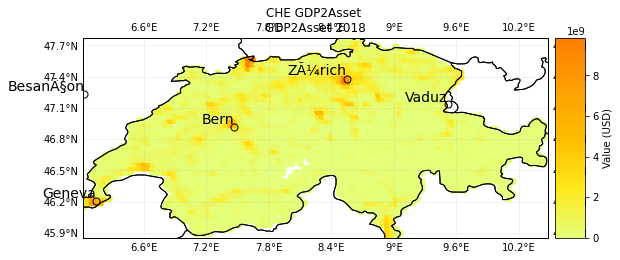

In [10]:
from matplotlib import colors
norm=colors.LogNorm(vmin=1.0e2, vmax=1.0e10)
gdpa.plot_scatter()

## Part 5: Setting JRC damage functions
In CLIMADA we currently calculate damage by translating flood-depth into a damage factors. Damage assessments implemented in CLIMADA base on the residential damage functions basing on an empirical estimate published in the JRC report. Individual damage functions are available for six continents:

RF1: Africa
RF2: Asia
RF3: Europe
RF4: North America
RF5: Oceania
RF6: South America

For further information on depth-damage functions, see also:

Huizinga, J., Moel, H. de and Szewczyk, W. (2017) Global flood depth-damage functions : Methodology and the Database with Guidelines, Joint Research Centre (JRC). doi: 10.2760/16510.

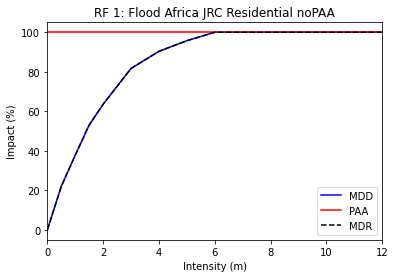

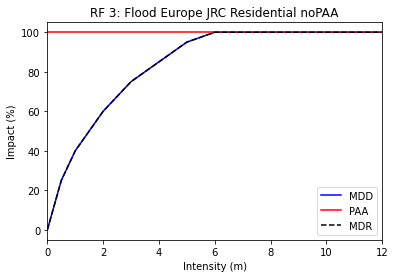

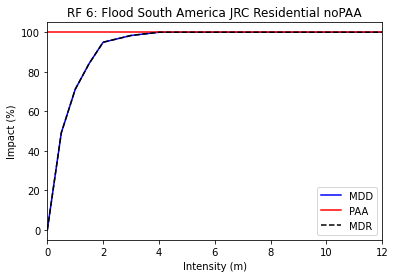

In [11]:
# import impact function set for RiverFlood using JRC damage functions () for 6 regions
from climada.entity.impact_funcs.river_flood import IFRiverFlood,flood_imp_func_set
if_set = flood_imp_func_set()
if_AFR = if_set.get_func(fun_id=1)
if_AFR[0].plot()
if_EUR = if_set.get_func(fun_id=3)
if_EUR[0].plot()
if_OCE = if_set.get_func(fun_id=6)
if_OCE[0].plot()

The plots illustrate how flood-depth is translated into a damage factor (0%-100%). The damage factor is then multiplied with the exposed asset in each grid cell to derive a local damage.

### Linking exposures to the correct impact function

If the ISIMIP exposure presented above is used, the correct impact function ID is automatically provided in the GeoDataFrame:

In [ ]:
gdpa

The column 'if_RF' indicates the ID of the impact function (in this case 3 for Europe).
If other Exposure data is used the impact function needs to be set manually.

## Part 6: Deriving flood impact with LitPop exposure

In [13]:
from climada.entity import LitPop
lp_exp = LitPop()
lp_exp.set_country('DEU', fin_mode='pc')
lp_exp

2021-03-05 12:50:19,993 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-03-05 12:50:19,994 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-03-05 12:50:19,995 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-03-05 12:50:19,996 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-03-05 12:50:19,997 - climada.entity.exposures.base - INFO - crs set to default value: EPSG:4326
2021-03-05 12:50:21,712 - climada.entity.exposures.litpop - INFO - Generating LitPop data at a resolution of 30.0 arcsec.
2021-03-05 12:50:32,459 - climada.entity.exposures.gpw_import - INFO - Reference year: 2016. Using nearest available year for GWP population data: 2015
2021-03-05 12:50:32,460 - climada.entity.exposures.gpw_import - INFO - GPW Version v4.11
2021-03-05 12:50:46,934 - climada.util.finance - INFO - GDP DEU 2014: 3.884e+12.
2021-03-05 12:50:47,378 - climada.util.finance 

/Users/ckropf/opt/anaconda3/envs/climada_uncertainty/lib/python3.7/site-packages/geopandas/geodataframe.py:91: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super(GeoDataFrame, self).__setattr__(attr, val)


/Users/ckropf/Documents/Climada/climada_python/climada/util/plot.py:326: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


/Users/ckropf/opt/anaconda3/envs/climada_uncertainty/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


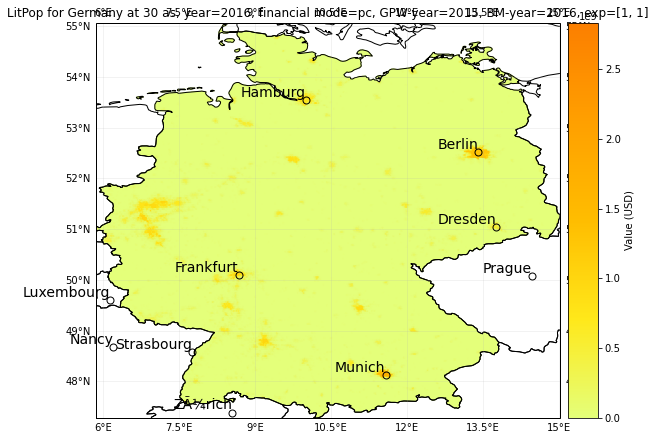

In [15]:
# In the LitPop exposure the damage function for river floods needs
# to be specified manually.
import pandas as pd
from climada.util.constants import RIVER_FLOOD_REGIONS_CSV

info = pd.read_csv(RIVER_FLOOD_REGIONS_CSV)
lp_exp.gdf['if_RF'] = info.loc[info['ISO']=='DEU','if_RF'].values[0]
lp_exp
lp_exp.plot_hexbin(pop_name=True)

2021-03-05 12:52:49,623 - climada.util.coordinates - INFO - Reading /Users/ckropf/climada/demo/data/flddph_2000_DEMO.nc
2021-03-05 12:52:49,640 - climada.util.coordinates - INFO - Reading /Users/ckropf/climada/demo/data/fldfrc_2000_DEMO.nc
2021-03-05 12:52:49,663 - climada.entity.exposures.base - INFO - Matching 661392 exposures with 41548 centroids.
2021-03-05 12:52:49,692 - climada.engine.impact - INFO - Calculating damage for 656379 assets (>0) and 1 events.


/Users/ckropf/Documents/Climada/climada_python/climada/util/plot.py:326: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


AttributeError: 'NoneType' object has no attribute 'get'

/Users/ckropf/opt/anaconda3/envs/climada_uncertainty/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


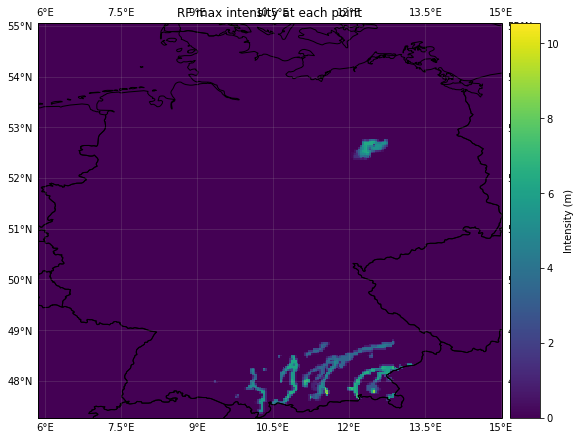

In [16]:
from climada.engine import Impact

rf = RiverFlood()
rf.set_from_nc(countries = ['DEU'], years=years, dph_path=HAZ_DEMO_FLDDPH, frc_path=HAZ_DEMO_FLDFRC)
imp=Impact()
imp.calc(lp_exp, if_set,rf,save_mat=True)
rf.plot_intensity(0)
imp.plot_scatter_eai_exposure()